In [0]:
%tensorflow_version 1.13.1
import pandas as pd
# Simple CNN model for CIFAR-10
import numpy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import TensorBoard
K.common.image_dim_ordering()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13.1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


'tf'

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# Create the model
model1 = Sequential()
model1.add(Conv2D(128, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model1.add(Dropout(0.5))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.3))
model1.add(Dense(num_classes, activation='softmax'))

In [0]:
# Compile model
epochs = 70
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [0]:
# Fit the model
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 52s 1ms/step - loss: 1.9029 - accuracy: 0.3102 - val_loss: 1.4122 - val_accuracy: 0.4902
Epoch 2/70
50000/50000 [==============================] - 45s 901us/step - loss: 1.3811 - accuracy: 0.5031 - val_loss: 1.2041 - val_accuracy: 0.5736
Epoch 3/70
50000/50000 [==============================] - 45s 901us/step - loss: 1.2448 - accuracy: 0.5561 - val_loss: 1.1091 - val_accuracy: 0.6083
Epoch 4/70
50000/50000 [==============================] - 45s 901us/step - loss: 1.1397 - accuracy: 0.5949 - val_loss: 1.0187 - val_accuracy: 0.6432
Epoch 5/70
50000/50000 [==============================] - 45s 901us/step - loss: 1.0584 - accuracy: 0.6239 - val_loss: 0.9736 - val_accuracy: 0.6556
Epoch 6/70
50000/50000 [==============================] - 45s 902us/step - loss: 0.9859 - accuracy: 0.6486 - val_loss: 0.9384 - val_accuracy: 0.6746
Epoch 7/70
50000/50000 [==============================] - 

In [0]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.50%


In [0]:
# Performance Change
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

In [0]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 243us/step - loss: 1.6841 - accuracy: 0.3718 - val_loss: 1.2954 - val_accuracy: 0.5282
Epoch 2/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.1842 - accuracy: 0.5718 - val_loss: 1.0815 - val_accuracy: 0.6187
Epoch 3/20
50000/50000 [==============================] - 11s 226us/step - loss: 0.9823 - accuracy: 0.6508 - val_loss: 0.8908 - val_accuracy: 0.6828
Epoch 4/20
50000/50000 [==============================] - 11s 227us/step - loss: 0.8512 - accuracy: 0.7001 - val_loss: 0.8410 - val_accuracy: 0.7093
Epoch 5/20
50000/50000 [==============================] - 11s 228us/step - loss: 0.7497 - accuracy: 0.7353 - val_loss: 0.8053 - val_accuracy: 0.7157
Epoch 6/20
50000/50000 [==============================] - 11s 229us/step - loss: 0.6863 - accuracy: 0.7568 - val_loss: 0.7237 - val_accuracy: 0.7531
Epoch 7/20
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
  384/50000 [..............................] - ETA: 11s - loss: 0.2372 - accuracy: 0.9115

In [0]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.15%


In [0]:
# Converting previous model to keras API model
from keras.models import Model
from keras.layers import Input

visible = Input(shape=(32,32,3))
x=Conv2D(32,(3,3),padding="same",activation='relu')(visible)
x=Dropout(0.2)(x)
x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
x=Dropout(0.3)(x)
x=Dense(num_classes, activation='softmax')(x)
model3 = Model(inputs=visible,output=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 678us/step - loss: 1.5103 - accuracy: 0.4643 - val_loss: 1.1329 - val_accuracy: 0.6021
Epoch 2/20
50000/50000 [==============================] - 33s 667us/step - loss: 1.1180 - accuracy: 0.6042 - val_loss: 1.0316 - val_accuracy: 0.6358
Epoch 3/20
50000/50000 [==============================] - 33s 667us/step - loss: 1.0071 - accuracy: 0.6457 - val_loss: 0.9445 - val_accuracy: 0.6699
Epoch 4/20
50000/50000 [==============================] - 33s 667us/step - loss: 0.9387 - accuracy: 0.6684 - val_loss: 0.9043 - val_accuracy: 0.6851
Epoch 5/20
50000/50000 [==============================] - 33s 666us/step - loss: 0.9007 - accuracy: 0.6837 - val_loss: 0.8874 - val_accuracy: 0.6958
Epoch 6/20
50000/50000 [==============================] - 33s 666us/step - loss: 0.8673 - accuracy: 0.6953 - val_loss: 0.8732 - val_accuracy: 0.6927
Epoch 7/20
50000/50000 [==============================] 

In [0]:
# Predicting the first four images of dataset
y=model1.predict_classes(X_train[[1],:])
print(y[0])

9


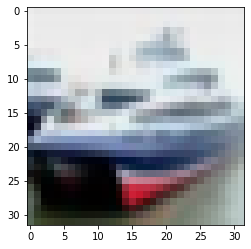

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


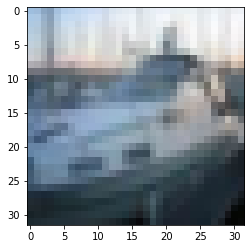

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


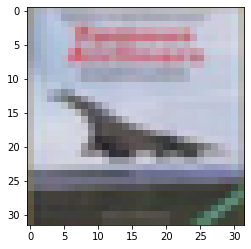

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 0


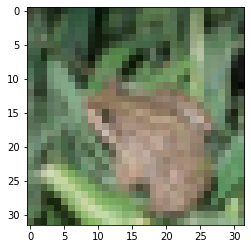

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 6


In [0]:
yp=y_test
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=model1.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])